In [61]:
from lightgbm import train
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [62]:
# 1. 데이터 불러오기
(train_data,train_label),(test_data,test_label)=keras.datasets.fashion_mnist.load_data()

In [63]:
print(type(train_data))
# 60000개, 사이즈 28*28
print(train_data.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


In [64]:
# 2. 정규화, 표준화 작업
np.max(train_data[0]) # 최대값 255, 최소값 0
train_data=train_data/255
test_data=test_data/255

In [65]:
# 클래스가 10개 분류 : 10개
print(np.unique(train_label))

[0 1 2 3 4 5 6 7 8 9]


In [66]:
# 3. train, test분리
train_scaled,val_scaled,train_label,val_label=train_test_split(train_data,train_label)

In [67]:
train_scaled.shape,val_scaled.shape


((45000, 28, 28), (15000, 28, 28))

In [68]:
# 4. 딥러닝 선언
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3)) # 규제 - 뉴런개수 30% 삭제
model.add(keras.layers.Dense(10,activation='softmax'))

In [69]:
# 딥러닝 설명 (sgd, 모멘텀, 네스테로브, rmsprop, adam 으로 돌려볼것)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [70]:
# 콜백선언
chpoint = keras.callbacks.ModelCheckpoint('b-model.h5')

In [71]:
# 조기종료
# restore_best_weight : 최고좋은값으로 돌아가라
early_stop=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

In [72]:
# 5. 딥러닝 훈련
history = model.fit(train_scaled,train_label,epochs=20,validation_data=(val_scaled,val_label),callbacks=[chpoint,early_stop])
print(history.history.keys())

Epoch 1/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.6065 - accuracy: 0.7882 - val_loss: 0.4300 - val_accuracy: 0.8432
Epoch 2/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4438 - accuracy: 0.8413 - val_loss: 0.3751 - val_accuracy: 0.8649
Epoch 3/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4101 - accuracy: 0.8516 - val_loss: 0.3536 - val_accuracy: 0.8719
Epoch 4/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3884 - accuracy: 0.8586 - val_loss: 0.3466 - val_accuracy: 0.8698
Epoch 5/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3711 - accuracy: 0.8643 - val_loss: 0.3397 - val_accuracy: 0.8733
Epoch 6/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3535 - accuracy: 0.8704 - val_loss: 0.3352 - val_accuracy: 0.8751
Epoch 7/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3429 - accuracy: 0.8736 - val_loss: 0.3289 - val_accuracy:

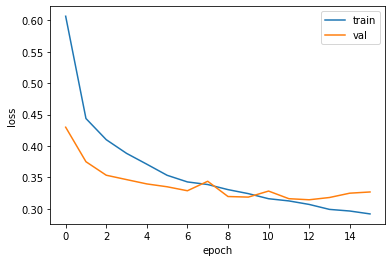

In [73]:
# 그래프 그리기
# loss, val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [74]:
# 정확도
score=model.evaluate(val_scaled,val_label)
print(score)

469/469 [==============================] - 0s 839us/step - loss: 0.3145 - accuracy: 0.8878
[0.3145204782485962, 0.8877999782562256]
